Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [8]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Encoding the Categorical Data

In [20]:
# encoding categorical features using one-hot encoding
car_dataset = pd.get_dummies(car_dataset, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [21]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,Maruti Wagon R LXI Minor,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,Hyundai Verna 1.6 SX,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,Datsun RediGO T Option,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,Honda Amaze VX i-DTEC,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


Splitting the data and Target

In [22]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [23]:
print(X)

      year  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0     2007      70000        False          False     False         True   
1     2007      50000        False          False     False         True   
2     2012     100000         True          False     False        False   
3     2017      46000        False          False     False         True   
4     2014     141000         True          False     False        False   
...    ...        ...          ...            ...       ...          ...   
4335  2014      80000         True          False     False        False   
4336  2014      80000         True          False     False        False   
4337  2009      83000        False          False     False         True   
4338  2016      90000         True          False     False        False   
4339  2016      40000        False          False     False         True   

      seller_type_Individual  seller_type_Trustmark Dealer  \
0                       T

In [24]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [26]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [27]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [28]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.45108684549088673


Visualize the actual prices and Predicted prices

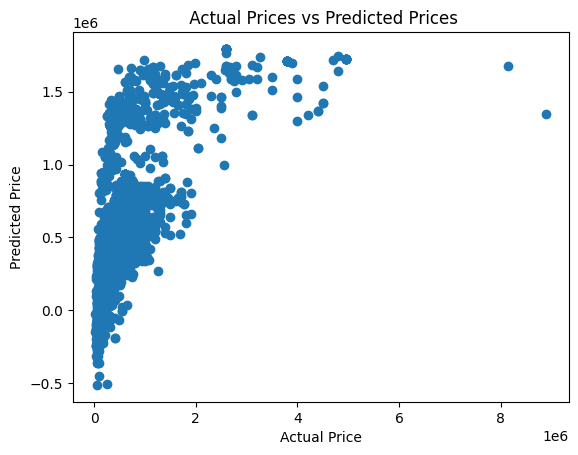

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [33]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5304591679401974


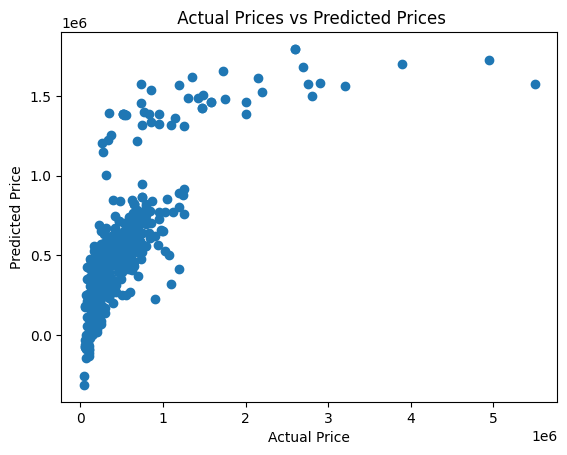

In [34]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [35]:
# loading the linear regression model
lass_reg_model = Lasso()

In [36]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [37]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [39]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.45108683177433817



Visualize the actual prices and Predicted prices

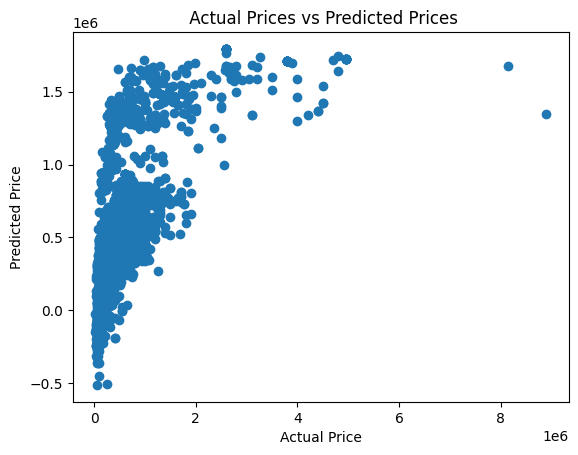

In [40]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [41]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [42]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.530455078466217


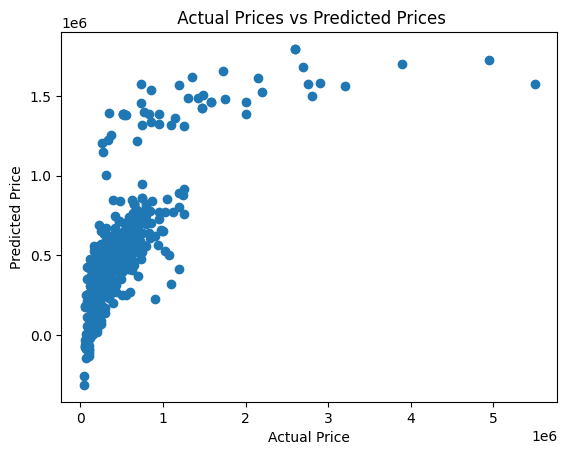

In [43]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()